## Pandas and Jupyter for Journos

Hello friend! 
* This is a Jupyter notebook instance.
* All the code on this page runs and works. 
* You can run and share this notebook.
 

### Step 1: Import the libraries you downloaded.

In [52]:
%matplotlib inline 
# This is a setup variable that lets you visualize in the notebook.
import matplotlib.pyplot as plt # This is the plotting library we are using. 
import pandas #This is the data analysis library we are using
plt.style.use('ggplot')

### Step 2: Now use Pandas to load and read your data.
* The main data structure in called a [dataframe](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).
* This is similiar to the R programming language.
* A dataframe is basically like a table loaded into memory you can manipulate with functions similiar to SQL.

In [20]:
df = pandas.read_excel('GTD-2015-2016.xlsx') # load your dataframe! Pandas can read excel, csv, etc.

In [21]:
print("There are", len(df.columns), "columns.")
# Let's only take the ones we need: dates, eventid, gname, nkill, nwound, summary, attacktype1_txt, country_txt.
# This is called a slice
df = df[['eventid','iyear','imonth','iday','gname','nkill','nwound','summary','attacktype1_txt','country_txt']]
df.head()

There are 129 columns.


,eventid,iyear,imonth,iday,gname,nkill,nwound,summary,attacktype1_txt,country_txt
0,201412030034,2015,1,3,Unknown,2.0,5.0,01/03/2015: An explosive device planted on a m...,Bombing/Explosion,Iraq
1,201412220095,2015,1,1,Muslim extremists,0.0,1.0,01/01/2015: Assailants stabbed Selvedin Begano...,Armed Assault,Bosnia-Herzegovina
2,201501010001,2015,1,1,Unknown,1.0,1.0,01/01/2015: An explosive device planted in a v...,Bombing/Explosion,Iraq
3,201501010002,2015,1,1,Unknown,0.0,0.0,01/01/2015: An assailant threw an explosive de...,Facility/Infrastructure Attack,Sweden
4,201501010003,2015,1,1,Shura Council of Benghazi Revolutionaries,NaN,NaN,01/01/2015: Assailants attacked a Haftar milit...,Bombing/Explosion,Libya


In [32]:
# We can also filter. All booleans work. You can chain them too!
# This distrubtion of the GTD contains both 2015 and 2016. Let's only take 2016.
df = df[df.iyear >= 2016]

### Basic analyses

* Dataframes have a really cool "describe" function.
* This should be the first thing you do with any dataset.
* The first thing I always do whenever I reload data is do a "sanity check" and make sure no rows are missing.
* Numbers always go missing!

In [41]:
df.describe()

,eventid,iyear,imonth,iday,nkill,nwound
count,1.344600e+04,13446.0,13446.000000,13446.000000,12657.000000,12291.000000
mean,2.016065e+11,2016.0,6.333556,15.563960,2.735482,3.239281
std,3.484692e+06,0.0,3.387209,8.849733,10.192771,18.079976
min,2.016010e+11,2016.0,1.000000,1.000000,0.000000,0.000000
25%,2.016033e+11,2016.0,3.000000,8.000000,0.000000,0.000000
50%,2.016062e+11,2016.0,6.000000,15.000000,1.000000,0.000000
75%,2.016092e+11,2016.0,9.000000,23.000000,2.000000,3.000000
max,2.017013e+11,2016.0,12.000000,31.000000,421.000000,1500.000000


### Frequency tables

In [82]:
# frequency tables: What does each mean?
df.nkill.value_counts().head() 

Iraq           3356
Afghanistan    1613
India          1016
Pakistan        859
Philippines     630
Name: country_txt, dtype: int64

In [84]:
df.nwound.value_counts().head()

0.0    6863
1.0    1216
2.0     732
3.0     600
4.0     484
Name: nwound, dtype: int64

In [85]:
df.country_txt.value_counts().head()

Iraq           3356
Afghanistan    1613
India          1016
Pakistan        859
Philippines     630
Name: country_txt, dtype: int64

### Sorting by column: Most deadly attacks (this is how I looked for mass executions)

In [89]:
df.sort_values('nkill', ascending=False)[:10]

,eventid,iyear,imonth,iday,gname,nkill,nwound,summary,attacktype1_txt,country_txt
27719,201612100011,2016,12,10,Islamic State of Iraq and the Levant (ISIL),421.0,NaN,"12/10/2016: Assailants, including suicide bomb...",Hostage Taking (Kidnapping),Syria
21920,201607020002,2016,7,3,Islamic State of Iraq and the Levant (ISIL),383.0,200.0,07/03/2016: A suicide bomber detonated an expl...,Bombing/Explosion,Iraq
16286,201602070020,2016,2,7,Islamic State of Iraq and the Levant (ISIL),300.0,0.0,02/07/2016: Assailants executed 300 civilian a...,Hostage Taking (Kidnapping),Iraq
25927,201610220007,2016,10,21,Islamic State of Iraq and the Levant (ISIL),284.0,0.0,10/21/2016: Assailants abducted 284 civilians ...,Hostage Taking (Kidnapping),Iraq
23750,201608190039,2016,8,19,Sudan People's Liberation Movement in Oppositi...,283.0,NaN,"08/19/2016: Assailants attacked Pajut, Jonglei...",Armed Assault,South Sudan
19054,201604210024,2016,4,21,Islamic State of Iraq and the Levant (ISIL),250.0,0.0,04/21/2016: Assailants executed 250 women in M...,Hostage Taking (Kidnapping),Iraq
26074,201610260019,2016,10,26,Islamic State of Iraq and the Levant (ISIL),190.0,0.0,10/26/2016: Assailants executed 190 people in ...,Hostage Taking (Kidnapping),Iraq
25254,201610030023,2016,10,3,Taliban,154.0,120.0,"10/03/2016: Assailants attacked Kunduz city, K...",Armed Assault,Afghanistan
15360,201601150004,2016,1,15,Al-Shabaab,141.0,NaN,01/15/2016: Multiple suicide bombers in explos...,Hostage Taking (Kidnapping),Somalia
27363,201611290020,2016,10,29,Islamic State of Iraq and the Levant (ISIL),130.0,0.0,10/29/2016: Assailants kidnapped and executed ...,Hostage Taking (Kidnapping),Iraq


### Descriptive plotting
Histograms are key to look at distributions.
I also like to use Seaborn, a great statistical python package.

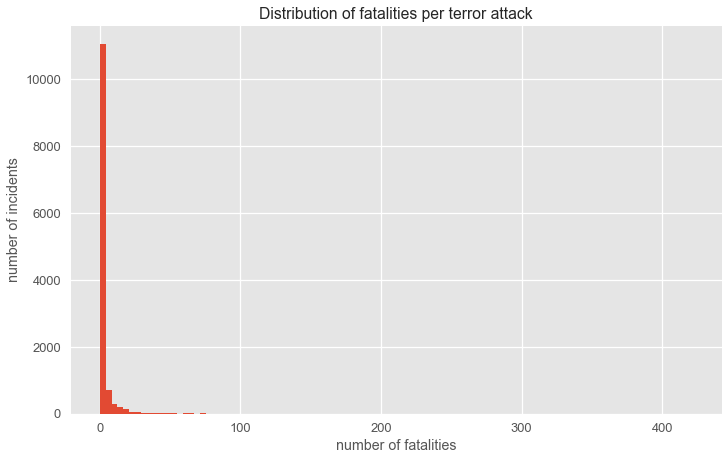

In [69]:
df.nkill.hist(bins=100)
plt.title("Distribution of fatalities per terror attack")
plt.ylabel('number of incidents')
plt.xlabel('number of fatalities')
# you can save: plt.savefig('PATH_TO_SAVE')

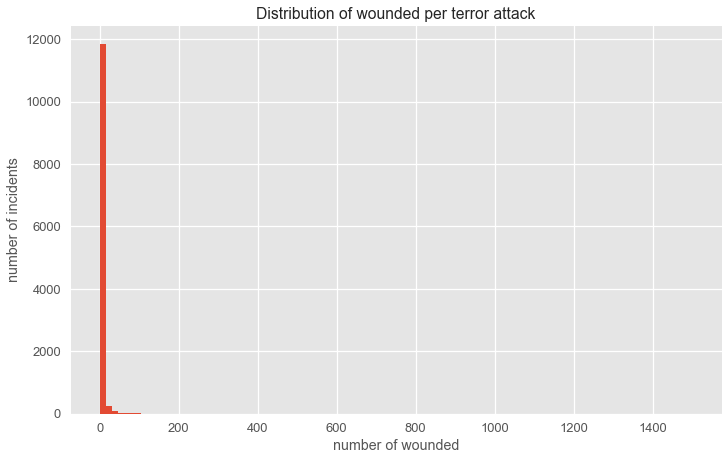

In [68]:
df.nwound.hist(bins=100)
plt.title("Distribution of wounded per terror attack")
plt.ylabel('number of incidents')
plt.xlabel('number of wounded')

## I/O data saving

In [ ]:
df.to_csv('PATH_TO_OUTPUT.csv')